In [28]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# data preparation

In [3]:
# load and read the data  
data = pd.read_csv("Dataset.csv")
data

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [4]:
# getting to know the data 
data.shape

(38765, 3)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [6]:
# checking for missing values 
data.isnull()

,Member_number,Date,itemDescription
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
38760,False,False,False
38761,False,False,False
38762,False,False,False
38763,False,False,False


In [4]:
# Convert the datecolumn to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y' )
data.dtypes

Member_number               int64
Date               datetime64[ns]
itemDescription            object
dtype: object

In [9]:
# Check for duplicates
duplicates = data.duplicated()
print(duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
38760    False
38761    False
38762    False
38763    False
38764    False
Length: 38765, dtype: bool


In [8]:
#renaming the itemDescription column to Item
data = data.rename(columns = {'itemDescription':'Item'})
data.head()

,Member_number,Date,Item,day,month,year
0,1808,2015-07-21,tropical fruit,Tuesday,7,2015
1,2552,2015-01-05,whole milk,Monday,1,2015
2,2300,2015-09-19,pip fruit,Saturday,9,2015
3,1187,2015-12-12,other vegetables,Saturday,12,2015
4,3037,2015-02-01,whole milk,Sunday,2,2015


In [5]:
# getting more columns from date column  
data['day'] = data['Date'].dt.day_name()
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year
data.head(1)

,Member_number,Date,itemDescription,day,month,year
0,1808,2015-07-21,tropical fruit,Tuesday,7,2015


# EDA and Visualizations

In [16]:
data.describe()

,Member_number,month,year
count,38765.000000,38765.000000,38765.000000
mean,3003.641868,6.487605,2014.528518
std,1153.611031,3.419042,0.499193
min,1000.000000,1.000000,2014.000000
25%,2002.000000,4.000000,2014.000000
50%,3005.000000,6.000000,2015.000000
75%,4007.000000,9.000000,2015.000000
max,5000.000000,12.000000,2015.000000


In [9]:
# group items by member_number 
transactions = data.groupby('Member_number')['Item'].apply(list).reset_index()
transactions

,Member_number,Item
0,1000,"[soda, canned beer, sausage, sausage, whole mi..."
1,1001,"[frankfurter, frankfurter, beef, sausage, whol..."
2,1002,"[tropical fruit, butter milk, butter, frozen v..."
3,1003,"[sausage, root vegetables, rolls/buns, deterge..."
4,1004,"[other vegetables, pip fruit, root vegetables,..."
...,...,...
3893,4996,"[dessert, salty snack, rolls/buns, misc. bever..."
3894,4997,"[tropical fruit, white wine, whole milk, curd,..."
3895,4998,"[rolls/buns, curd]"
3896,4999,"[bottled water, butter milk, tropical fruit, b..."


The transactions table shows that there are 3898 transactions with unique id.

In [21]:
# unique items 
item_count = data['Item'].value_counts()
print(item_count)

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: Item, Length: 167, dtype: int64


There are 167 unique items 

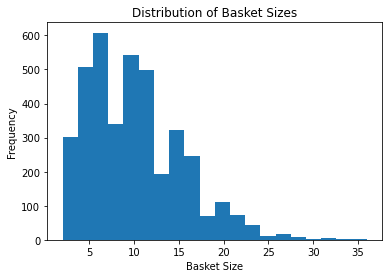

In [23]:
#Explore the distribution of the number of items in each transaction (basket size).
basket_sizes = data.groupby('Member_number')['Item'].count()
plt.hist(basket_sizes, bins=20)
plt.xlabel('Basket Size')
plt.ylabel('Frequency')
plt.title('Distribution of Basket Sizes')
plt.show()

The histogram illustrates the distribution of basket sizes in the dataset, offering insights into 
the average number of items in each member's transaction basket, with each bar representing the frequency of baskets 
within specific size ranges.

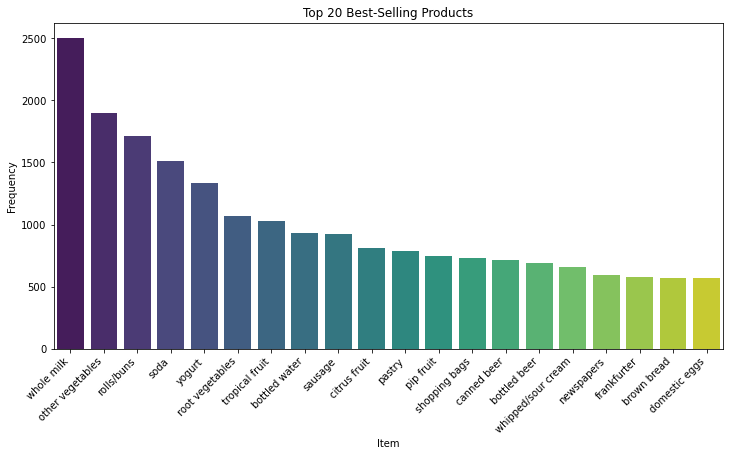

In [52]:
# best selling products 

# Assuming df is your DataFrame with the market basket data
# You might need to adapt column names based on your actual data
item_counts = data['Item'].value_counts().reset_index()
item_counts.columns = ['item', 'frequency']

# Sort items by frequency in descending order
item_counts = item_counts.sort_values(by='frequency', ascending=False)

# Select the top 10 or top 20 items
top_n_items = item_counts.head(20)  # Adjust 10 to your desired number

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='item', y='frequency', data=top_n_items, palette='viridis')
plt.xlabel('Item')
plt.ylabel('Frequency')
plt.title(f'Top {len(top_n_items)} Best-Selling Products')
plt.xticks(rotation=45, ha='right')
plt.show()


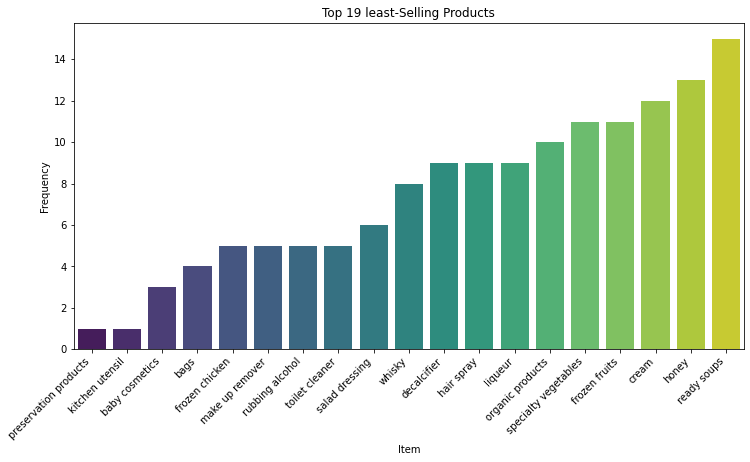

In [34]:
# bottom selling products 

item_counts = data['Item'].value_counts().reset_index()
item_counts.columns = ['item', 'frequency']

# Sort items by frequency in descending order
item_counts = item_counts.sort_values(by='frequency', ascending= True)

# Select the top 10 or top 20 items
top_n_items = item_counts.head(19)  # Adjust 10 to your desired number

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='item', y='frequency', data=top_n_items, palette='viridis')
plt.xlabel('Item')
plt.ylabel('Frequency')
plt.title(f'Top {len(top_n_items)} least-Selling Products')
plt.xticks(rotation=45, ha='right')
plt.show()


The bar charts above is to visualize the top-selling products and the least-selling products in the dataset.This visualization helps identify the most popular or best selling products and the least popular products, providing insights into customer preferences.

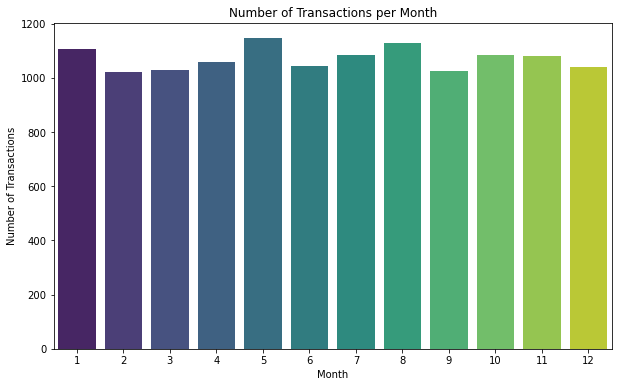

In [63]:
# months and number of transactions

# Count the number of transactions for each month
monthly_transactions = data.groupby('month')['Member_number'].nunique().reset_index()
monthly_transactions.columns = ['month', 'num_transactions']


# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='num_transactions', data=monthly_transactions, palette='viridis')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions per Month')
plt.show()


The bar chart shows the distribution of transaction across different months.

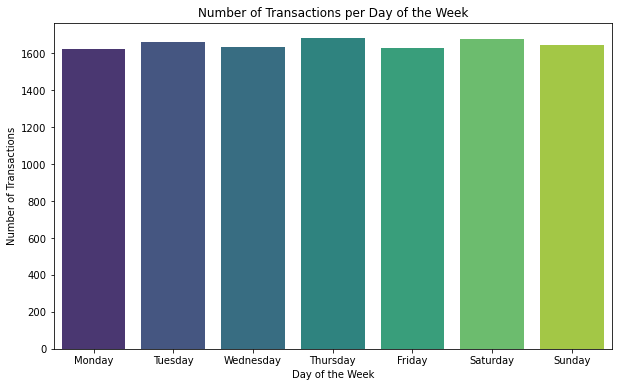

In [69]:
# day of week and purchase 

# Count the number of transactions for each day of the week
daily_transactions = data.groupby('day')['Member_number'].nunique().reset_index()
daily_transactions.columns = ['day', 'num_transactions']

# Map day_of_week values to actual day names
day_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_transactions['day_name'] = daily_transactions['day'].map(dict(enumerate(day_names)))

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='day_name', y='num_transactions', data=daily_transactions, palette='viridis')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions per Day of the Week')
plt.show()


The bar chart shows the distribution of transaction across the different days of the week.

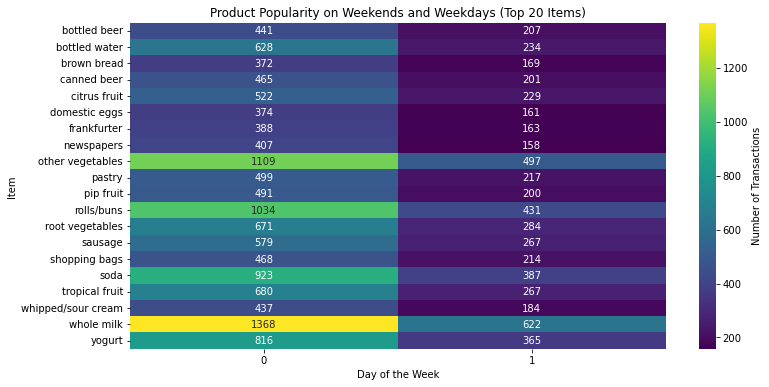

In [80]:
# Map day_of_week values to weekend (1) or weekday (0)
data['weekend'] = data['day'].isin([5, 6]).astype(int)


# Count the number of transactions for each product on weekends and weekdays
product_popularity = data.groupby(['Item', 'weekend'])['Member_number'].nunique().reset_index()
product_popularity.columns = ['Item', 'weekend', 'num_transactions']


# Select the top 10 items 
top_N_items = product_popularity.groupby('Item')['num_transactions'].sum().nlargest(20).index

# Filter product_popularity to include only the top items
filtered_product_popularity = product_popularity[product_popularity['Item'].isin(top_N_items)]

# Pivot the table for better visualization
product_popularity_pivot = filtered_product_popularity.pivot(index='Item', columns='weekend', values='num_transactions').fillna(0)

# Plot the results
plt.figure(figsize=(12, 6))
sns.heatmap(product_popularity_pivot, cmap='viridis', annot=True, fmt='g', cbar_kws={'label': 'Number of Transactions'})
plt.xlabel('Day of the Week')
plt.ylabel('Item')
plt.title('Product Popularity on Weekends and Weekdays (Top 20 Items)')
plt.show()


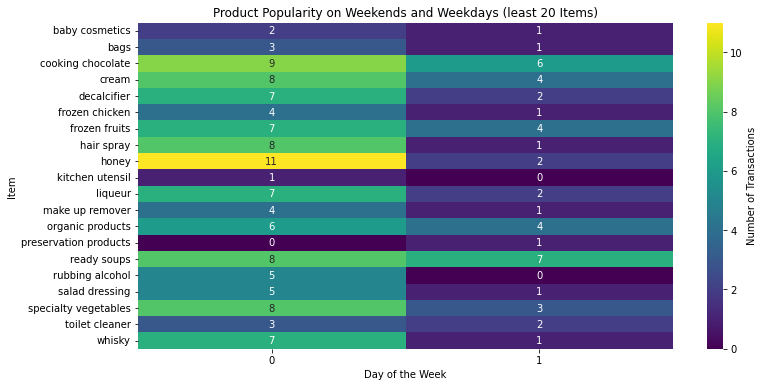

In [82]:
# Map day_of_week values to weekend (1) or weekday (0)
data['weekend'] = data['day'].isin([5, 6]).astype(int)


# Count the number of transactions for each product on weekends and weekdays
product_popularity = data.groupby(['Item', 'weekend'])['Member_number'].nunique().reset_index()
product_popularity.columns = ['Item', 'weekend', 'num_transactions']


# Select the bottom 10 items 
least_items = product_popularity.groupby('Item')['num_transactions'].sum().nsmallest(20).index

# Filter product_popularity to include only the top items
filtered_product_popularity = product_popularity[product_popularity['Item'].isin(least_items)]

# Pivot the table for better visualization
product_popularity_pivot = filtered_product_popularity.pivot(index='Item', columns='weekend', values='num_transactions').fillna(0)

# Plot the results
plt.figure(figsize=(12, 6))
sns.heatmap(product_popularity_pivot, cmap='viridis', annot=True, fmt='g', cbar_kws={'label': 'Number of Transactions'})
plt.xlabel('Day of the Week')
plt.ylabel('Item')
plt.title('Product Popularity on Weekends and Weekdays (least 20 Items)')
plt.show()


The charts above are analyzing the popularity of products based on the day of the week, distinguishing between weekdays and weekends. The heatmap provides a visual representation of how popular each product is on weekends and weekdays, allowing for easy identification of trends and patterns in customer behavior.

# market basket analysis 

In [10]:
# Convert 'Item' column to a string to handle non-unique values within transactions
transactions['Item'] = transactions['Item'].astype(str)

# One-hot-encode the data
basket = transactions.groupby('Member_number')['Item'].apply(lambda x: ','.join(x)).str.get_dummies(',')

# If you prefer 1 and 0 instead of True and False
basket = basket.astype(bool).astype(int)
# Now 'basket' is a one-hot-encoded DataFrame suitable for market basket analysis


In [11]:
basket.head()

,'Instant food products','Instant food products'],'UHT-milk','UHT-milk'],'abrasive cleaner','abrasive cleaner'],'artif. sweetener','artif. sweetener'],'baby cosmetics','baby cosmetics'],...,['tropical fruit',['turkey',['vinegar',['waffles',['whipped/sour cream',['white bread',['white wine',['whole milk',['yogurt',['zwieback'
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# apply association rule mining algorithm 

# Apply Apriori algorithm to discover frequent itemsets
min_support = 0.05

frequent_itemsets = apriori(basket, min_support=min_support, use_colnames=True)

# Generate association rules
min_confidence = 0.5 
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=min_confidence)


C:\Anaconda\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [30]:
# Display the generated association rules
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,( 'canned beer'),( 'whole milk'),0.127501,0.400205,0.067214,0.527163,1.317232,0.016187,1.268502,0.276026
1,( 'newspapers'),( 'whole milk'),0.107234,0.400205,0.054387,0.507177,1.267292,0.011471,1.217059,0.236250
2,( 'sausage'),( 'whole milk'),0.147768,0.400205,0.078245,0.529514,1.323106,0.019108,1.274841,0.286545
3,( 'shopping bags'),( 'whole milk'),0.125705,0.400205,0.067470,0.536735,1.341149,0.017163,1.294711,0.290944
4,( 'yogurt'),( 'whole milk'),0.239097,0.400205,0.121088,0.506438,1.265445,0.025400,1.215236,0.275678
5,"( 'rolls/buns', 'other vegetables')",( 'whole milk'),0.118266,0.400205,0.066957,0.566161,1.414675,0.019627,1.382527,0.332440
6,"( 'soda', 'other vegetables')",( 'whole milk'),0.102360,0.400205,0.054387,0.531328,1.327640,0.013422,1.279776,0.274925
7,"( 'yogurt', 'other vegetables')",( 'whole milk'),0.096203,0.400205,0.054643,0.568000,1.419272,0.016142,1.388414,0.326858
8,"( 'soda', 'rolls/buns')",( 'whole milk'),0.092612,0.400205,0.050026,0.540166,1.349723,0.012962,1.304373,0.285553
9,"( 'rolls/buns', 'yogurt')",( 'whole milk'),0.086711,0.400205,0.052078,0.600592,1.500709,0.017376,1.501708,0.365326


In [32]:
# Display the top 10 rules with the highest lift
top_lift_rules = sorted_rules.head(10)
print("Top 10 Rules with Highest Lift:")
#print(top_lift_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
top_lift_rules

# Interpretation: High lift indicates a strong association between antecedents and consequents.


Top 10 Rules with Highest Lift:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
9,"( 'rolls/buns', 'yogurt')",( 'whole milk'),0.086711,0.400205,0.052078,0.600592,1.500709,0.017376,1.501708,0.365326
7,"( 'yogurt', 'other vegetables')",( 'whole milk'),0.096203,0.400205,0.054643,0.568000,1.419272,0.016142,1.388414,0.326858
5,"( 'rolls/buns', 'other vegetables')",( 'whole milk'),0.118266,0.400205,0.066957,0.566161,1.414675,0.019627,1.382527,0.332440
8,"( 'soda', 'rolls/buns')",( 'whole milk'),0.092612,0.400205,0.050026,0.540166,1.349723,0.012962,1.304373,0.285553
3,( 'shopping bags'),( 'whole milk'),0.125705,0.400205,0.067470,0.536735,1.341149,0.017163,1.294711,0.290944
6,"( 'soda', 'other vegetables')",( 'whole milk'),0.102360,0.400205,0.054387,0.531328,1.327640,0.013422,1.279776,0.274925
2,( 'sausage'),( 'whole milk'),0.147768,0.400205,0.078245,0.529514,1.323106,0.019108,1.274841,0.286545
0,( 'canned beer'),( 'whole milk'),0.127501,0.400205,0.067214,0.527163,1.317232,0.016187,1.268502,0.276026
1,( 'newspapers'),( 'whole milk'),0.107234,0.400205,0.054387,0.507177,1.267292,0.011471,1.217059,0.236250
4,( 'yogurt'),( 'whole milk'),0.239097,0.400205,0.121088,0.506438,1.265445,0.025400,1.215236,0.275678


Higher lift values indicate stronger associations, suggesting that the occurrence of the antecedent has a significant impact on the occurrence of the consequent compared to random chance.